# Twitter Sentiment Analysis
### Project By: Abdullah Javed

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Tweets.csv")

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
data.shape

(14640, 15)

**Input Data Characteristics**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

The dataset have most negative tweets

In [ ]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
data.duplicated().sum()

36

In [ ]:
data = data.drop_duplicates()

**NLP Techniques**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [ ]:
len(stop_words)

179

So, we have 179 stopwords in English language

In [ ]:
import re

In [ ]:
def remove_user(text):
    return re.sub('@[^\s]+','',text)

def remove_htmltag(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_punctuation(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def charOnly(text):
    txt = re.sub(r'[^a-zA-Z]',' ',text)
    return txt

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text


In [ ]:
import string

In [ ]:
data['cleaned_text'] = data['text'].apply(remove_user)
data['cleaned_text'] = data['cleaned_text'].apply(remove_url)
data['cleaned_text'] = data['cleaned_text'].apply(remove_htmltag)
data['cleaned_text'] = data['cleaned_text'].apply(decontraction)
data['cleaned_text'] = data['cleaned_text'].apply(remove_punctuation)
data['cleaned_text'] = data['cleaned_text'].apply(seperate_alphanumeric)
data['cleaned_text'] = data['cleaned_text'].apply(charOnly)
data['cleaned_text'] = data['cleaned_text'].apply(lambda x : x.lower())
data['cleaned_text'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
data = data[data['cleaned_text'] != '']

In [ ]:
data['cleaned_text'] = data['negativereason'].fillna('') + ' ' + data['cleaned_text']

<ipython-input-615-be4bb74018a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['negativereason'].fillna('') + ' ' + data['cleaned_text']


In [ ]:
original_lengths = data['text'].apply(lambda x: len(x.split()))
cleaned_lengths = data['cleaned_text'].apply(lambda x: len(x.split()))

**Visualization**

Reasons Of Negative Tweets : green
Customer Service Issue         2901
Late Flight                    1660
Can't Tell                     1185
Cancelled Flight                842
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


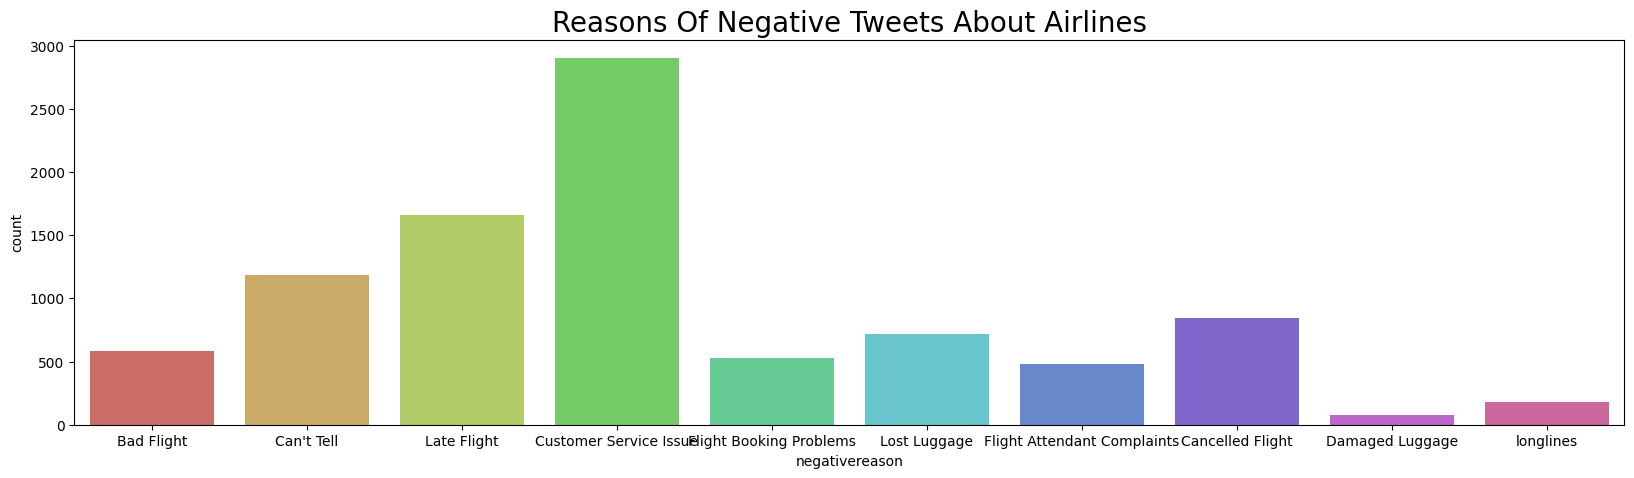

In [ ]:
print('Reasons Of Negative Tweets :','green')
print(data.negativereason.value_counts())

plt.figure(figsize = (20, 5))
sns.countplot(x = 'negativereason', data = data, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

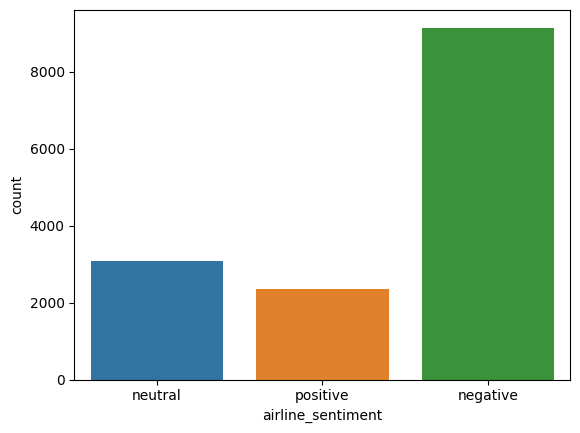

In [ ]:
ax = sns.countplot(x="airline_sentiment", data=data)

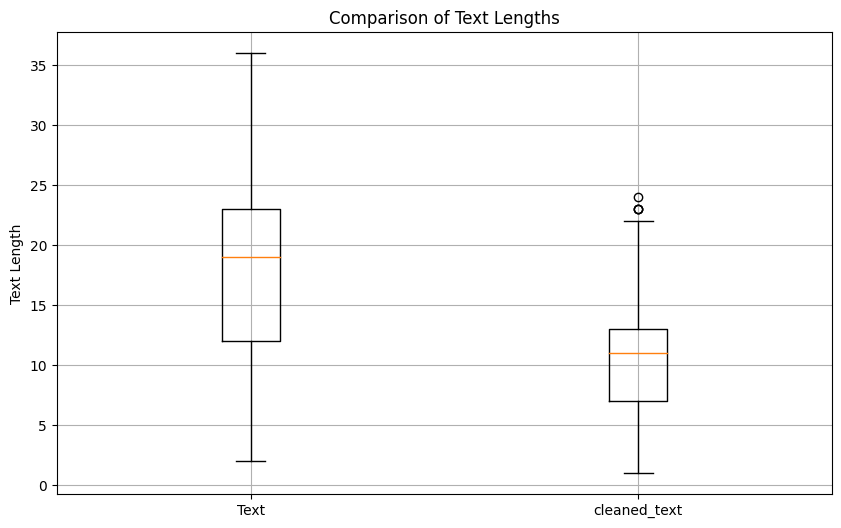

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([original_lengths, cleaned_lengths], labels=['Text', 'cleaned_text'])
plt.ylabel('Text Length')
plt.title('Comparison of Text Lengths')
plt.grid(True)
plt.show()

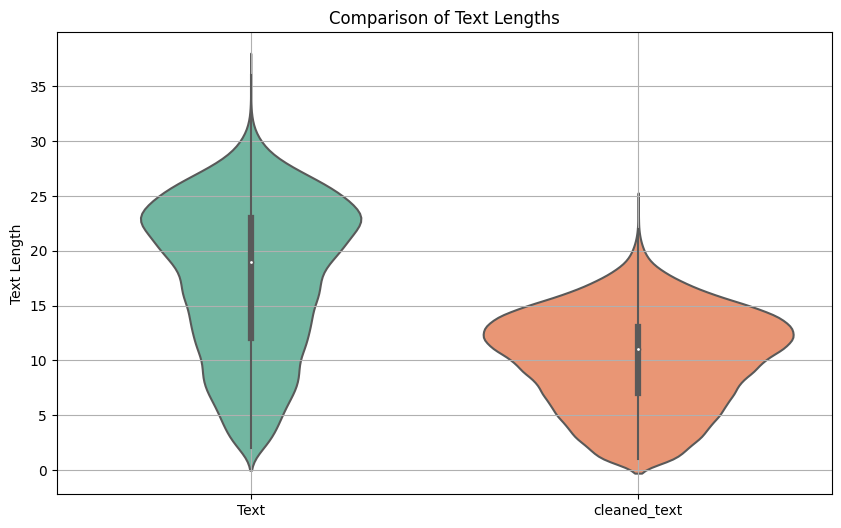

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=[original_lengths, cleaned_lengths], palette='Set2')
plt.xticks([0, 1], ['Text', 'cleaned_text'])
plt.ylabel('Text Length')
plt.title('Comparison of Text Lengths')
plt.grid(True)
plt.show()

In [ ]:
positive = data[data['airline_sentiment'] == 'positive'].text
negative = data[data['airline_sentiment'] == 'negative'].text
neutral = data[data['airline_sentiment'] == 'neutral'].text

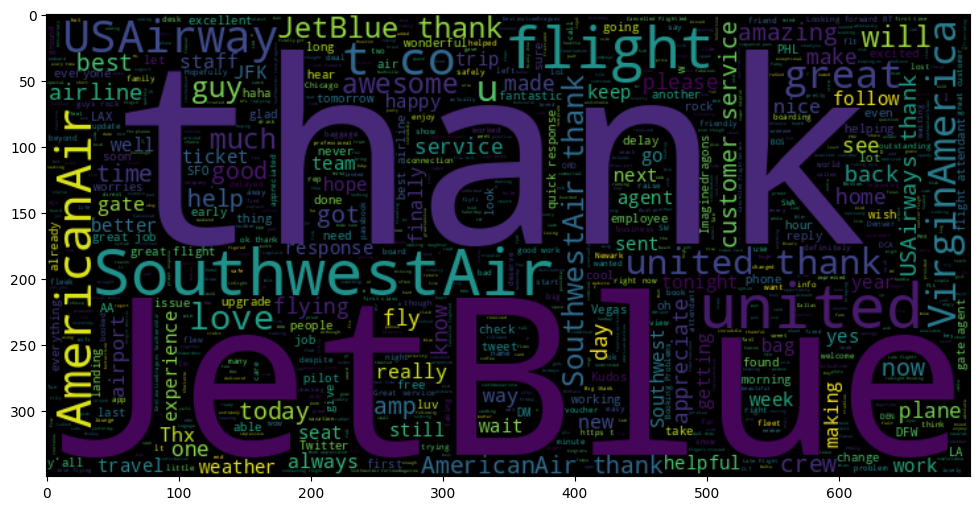

In [ ]:
plt.figure(figsize=(12,6))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=700,height=350).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')

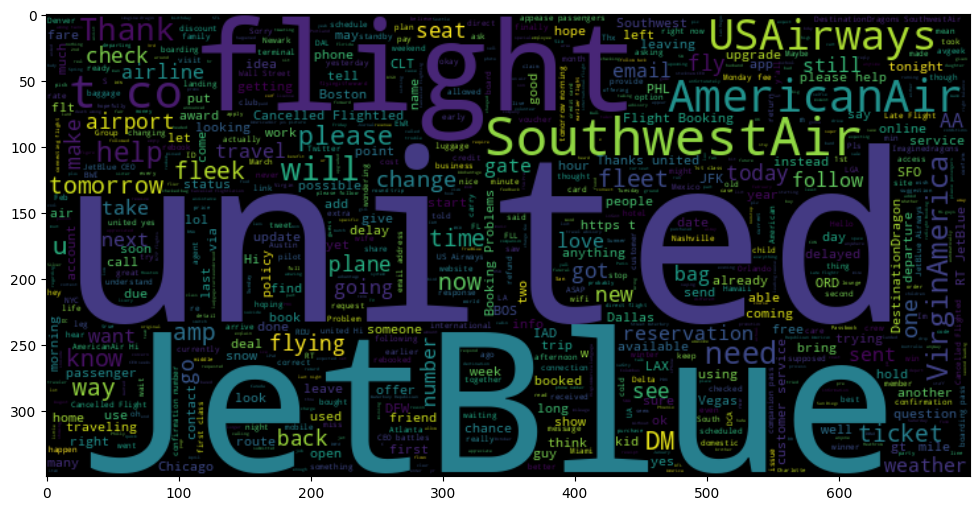

In [ ]:
plt.figure(figsize=(12,6))
world_cloud_neutral=WordCloud(min_font_size=3,max_words=3200,width=700,height=350).generate(" ".join(neutral))
plt.imshow(world_cloud_neutral,interpolation='bilinear')

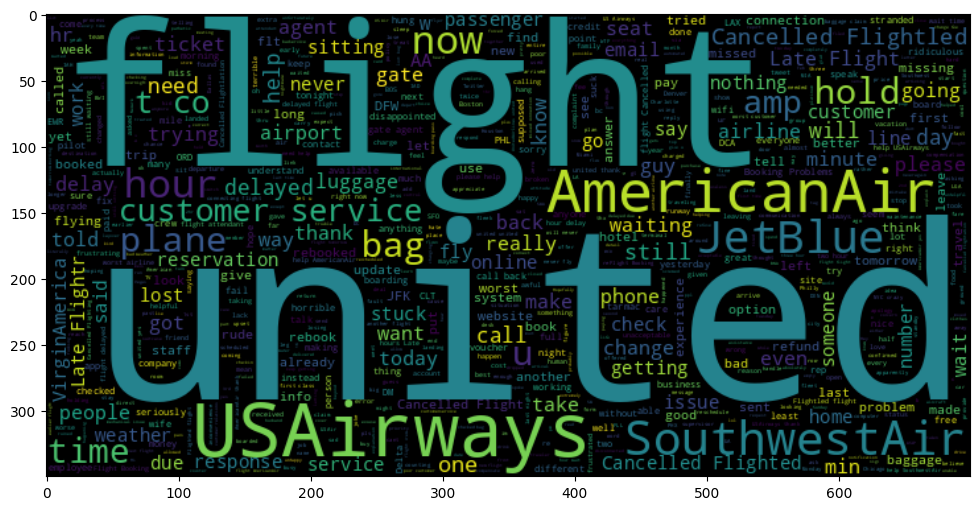

In [ ]:
plt.figure(figsize = (12,6))
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3200 , width = 700 , height = 350).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = data['cleaned_text']
y = data['airline_sentiment']

In [ ]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling TEchnique (SMOTE)

In [ ]:
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.20, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Random Forest Classifier

In [ ]:
random_forest_classifier = RandomForestClassifier()

In [ ]:
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [ ]:
accuracy_score(random_forest_classifier_prediction,y_test)

0.9706739526411657

## Support Vector Machine

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
svm_prediction =  svm.predict(X_test)

In [ ]:
accuracy_score(svm_prediction,y_test)

0.9795992714025501

## Naive Bayesian

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
nb_prediction =  nb.predict(X_test)

In [ ]:
accuracy_score(nb_prediction,y_test)

0.8883424408014572

## Decision Tree Classifier

In [ ]:
des_tree_classifier = DecisionTreeClassifier()
des_tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
des_tree_classifier_prediction=des_tree_classifier.predict(X_test)

In [ ]:
accuracy_score(des_tree_classifier_prediction,y_test)

0.9426229508196722

## Classification Report

In [ ]:
cr = classification_report(y_test, svm_prediction)

In [ ]:
print("Classification Report:\n----------------------\n", cr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    negative       0.99      1.00      0.99      1865
     neutral       0.98      0.96      0.97      1793
    positive       0.97      0.98      0.97      1832

    accuracy                           0.98      5490
   macro avg       0.98      0.98      0.98      5490
weighted avg       0.98      0.98      0.98      5490



## Confusion Matrix

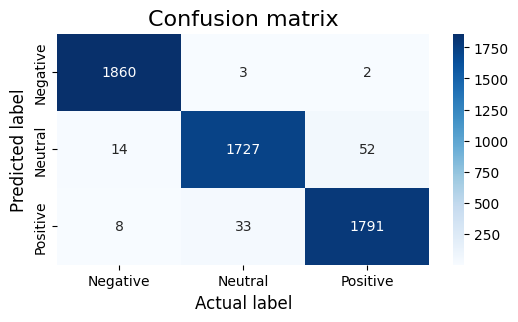

In [ ]:
cm = confusion_matrix(y_test,svm_prediction)

plt.figure(figsize=(6,3))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()